# Support Vector Machines


In this notebook we gain some visual intuition on how Support Vector Machine (SVM) classifiers work with a dataset in 2 dimensions, and then build a spam classifier with SVMs!

![Kernel Machine](img/Kernel_Machine.png?raw=true "Kernel Machine")

SVMs help us look at our training examples and learn a way to map them to a high-dimensional space so that we can separate different categories with boundaries that are as wide as possible (as in the image above). When a new example comes along, we can map it to that space and categorize it based on which side of the boundaries it falls on. 

This mapping is possible due to a [_kernel_](https://en.wikipedia.org/wiki/Kernel_method) function. This is the function that maps the examples into a high-dimensional space. Use of kernel functions are often called kernel tricks because we don't need to know the exact mapping of the examples into that space (which can be expensive to compute), but rather only the _similarity_ between those mappings (which can be cheaper to compute).

Even if this is all a bit fuzzy, SVMs are important to know and interesting to look at because they have been a [popular](https://www.quora.com/Why-did-SVM-become-more-popular-than-Logistic-Regression) [black-box](https://datascience.stackexchange.com/questions/711/are-support-vector-machines-still-considered-state-of-the-art-in-their-niche) [choice](https://www.researchgate.net/post/Can_we_say_that_SVM_is_the_best_classifier_to_date14) for machine learning practitioners.

This code was ported from Octave/Matlab to python and was part of the absolutely excellent [Machine Learning course](http://ml-class.org) by Stanford's [Andrew Ng](http://www.andrewng.org) on Coursera.

---

In [4]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## Visualization

We can start by visualizing our dataset

In [40]:
def plotData(X, y):
    #PLOTDATA Plots the data points X and y into a new figure 
    #   PLOTDATA(x,y) plots the data points with + for the positive examples
    #   and o for the negative examples. X is assumed to be a Mx2 matrix.
    #
    # Note: This was slightly modified such that it expects y = 1 or y = 0

    # Find Indices of Positive and Negative Examples
    y = y.flatten()
    pos = y==1
    neg = y==0
    # Plot Examples
    plt.plot(X[:,0][pos], X[:,1][pos], "k+", markersize=15, mew=3)
    plt.plot(X[:,0][neg], X[:,1][neg], "yo", markersize=15)

    # alternatives
    #
    # plt.scatter(*zip(*X[pos]), c="k", marker='+', s=100)
    # plt.scatter(*zip(*X[neg]), c="y", marker='o', s=100)
    #
    # plt.plot(X[:,0][pos], X[:,1][pos], 'k+', X[:,0][neg], X[:,1][neg], 'yo', markersize=10)

    plt.show()

Loading and Visualizing Data ...


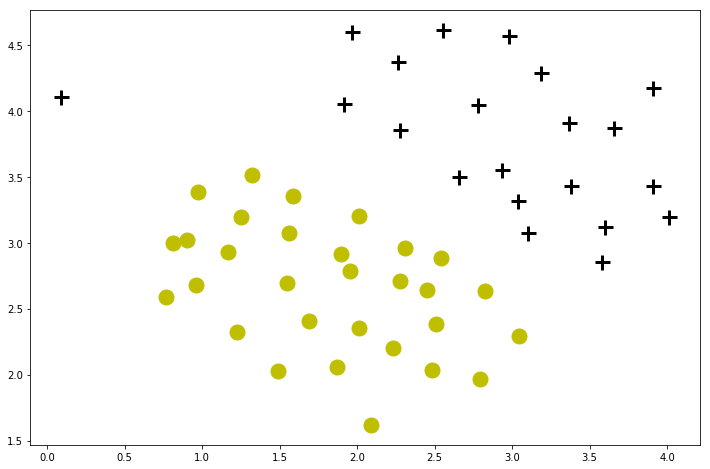

In [49]:
## =============== Part 1: Loading and Visualizing Data ================
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.
#

print('Loading and Visualizing Data ...')

# Load from ex6data1: 
# You will have X, y in your environment
mat = scipy.io.loadmat('data/svm/ex6data1.mat')
X = mat["X"]
y = mat["y"]

plt.figure(figsize=(12,8))
plotData(X, y)

## Linear kernel SVM

Now we can load ``svmTrain()``, a wrapper function to train a SVM. It's defined to accept other kernels moving forward.

In [8]:
def linearKernel(x1, x2):
    #LINEARKERNEL returns a linear kernel between x1 and x2
    #   sim = linearKernel(x1, x2) returns a linear kernel between x1 and x2
    #   and returns the value in sim

    # Ensure that x1 and x2 are column vectors
    # x1 = x1.flatten()
    # x2 = x2.flatten()

    # Compute the kernel
    sim = np.dot(x1, x2.T)  # dot product
    return sim

def svmTrain(X, y, C, kernelFunction, tol=1e-3, max_passes=-1, sigma=0.1):
    """Trains an SVM classifier"""

    y = y.flatten() # prevents warning

    # alternative to emulate mapping of 0 -> -1 in svmTrain.m
    #  but results are identical without it
    # also need to cast from unsigned int to regular int
    # otherwise, contour() in visualizeBoundary.py doesn't work as expected
    # y = y.astype("int32")
    # y[y==0] = -1

    if kernelFunction == "gaussian":
        clf = svm.SVC(C = C, kernel="precomputed", tol=tol, max_iter=max_passes, verbose=2)
        return clf.fit(gaussianKernelGramMatrix(X,X, sigma=sigma), y)

    # elif kernelFunction == "linear":
    #     clf = svm.SVC(C = C, kernel="precomputed", tol=tol, max_iter=max_passes, verbose=2)
    #     return clf.fit(np.dot(X,X.T).T, y)

    else: # works with "linear", "rbf"
        clf = svm.SVC(C = C, kernel=kernelFunction, tol=tol, max_iter=max_passes, verbose=2)
        return clf.fit(X, y)

We also define a function to visualize the linear boundary:

In [42]:
def visualizeBoundaryLinear(X, y, model):
    #VISUALIZEBOUNDARYLINEAR plots a linear decision boundary learned by the
    #SVM
    #   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a linear decision boundary 
    #   learned by the SVM and overlays the data on it

    # plot decision boundary
    # right assignments from http://stackoverflow.com/a/22356267/583834
    
    w = model.coef_[0]
    b = model.intercept_[0]
    xp = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    yp = - (w[0] * xp + b) / w[1]

     
    #
    y = y.flatten()
    pos = y==1
    neg = y==0
    plt.plot(xp, yp, 'b-')  
    # Plot Examples
    plotData(X, y)

Training Linear SVM ...
[LibSVM]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


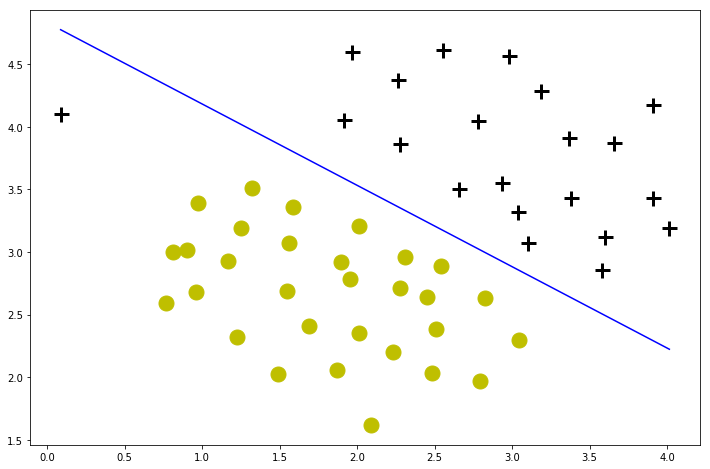

In [50]:
## ==================== Part 2: Training Linear SVM ====================
#  The following code will train a linear SVM on the dataset and plot the
#  decision boundary learned.
#

print('Training Linear SVM ...')

# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1
model = svmTrain(X, y, C, "linear", 1e-3, 20)
plt.close()
plt.figure(figsize=(12,8))
visualizeBoundaryLinear(X, y, model)


We can also try a different value for ``C``, the parameter that tells the linear SVM "how much you want to avoid misclassifying each training example" [(as stated here)](https://stats.stackexchange.com/a/31067/19809). That is, it's a penalty for misclassified examples.

You can also see great visual representations the effects of low and high ``C`` values on different datasets [here](https://stats.stackexchange.com/a/159051/19809).

[LibSVM]

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


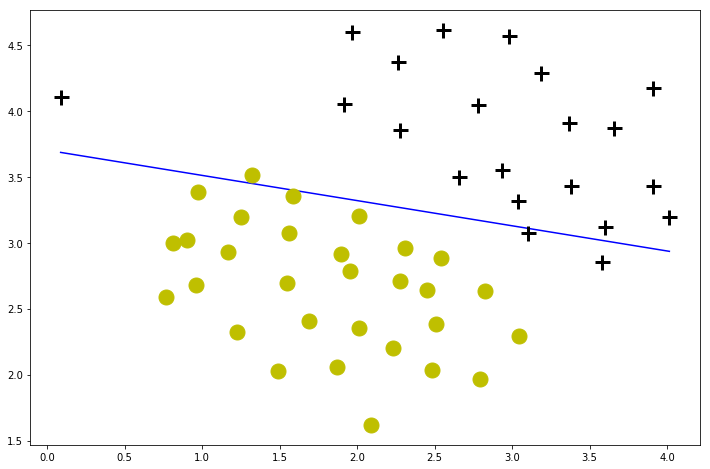

In [51]:
C = 100
model = svmTrain(X, y, C, "linear", 1e-3, 20)
plt.close()
plt.figure(figsize=(12,8))
visualizeBoundaryLinear(X, y, model)

We can see that, in an effort to accommodate the outlier around (0,4), the ``C=100`` boundary performs worse than with ``C=1``.

## Gaussian Kernel SVM

We extend our SVM capabilities by defining a Gaussian RBF kernel. In case you're curious, here's a more detailed explanation of the [difference between a Gaussian kernel and a Gaussian _RBF_ kernel](https://stats.stackexchange.com/questions/79192/gaussian-rbf-vs-gaussian-kernel). Roughly, the Gaussian RBF kernel used here helps us measure the distance or the similarity between a pair of examples. 

We use a ``sigma`` parameter that indicates how quickly the similarity metric decreases as two examples are further apart.

Using a custom kernel with [``sklearn.svm.SCV()``](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) was not as well documented as I'd hoped, so I put up an [answer about it](https://stackoverflow.com/a/38647546/583834) in Stack Overflow.

In [45]:
def gaussianKernel(x1, x2, sigma=0.1):
    #RBFKERNEL returns a radial basis function kernel between x1 and x2
    #   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
    #   and returns the value in sim

    # Ensure that x1 and x2 are column vectors
    x1 = x1.flatten()
    x2 = x2.flatten()

    # You need to return the following variables correctly.
    sim = 0

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return the similarity between x1
    #               and x2 computed using a Gaussian kernel with bandwidth
    #               sigma
    #
    #

    sim = np.exp(- np.sum( np.power((x1 - x2),2) ) / float( 2*(sigma**2) ) )
    return sim
def gaussianKernelGramMatrix(X1, X2, K_function=gaussianKernel, sigma=0.1):
    """(Pre)calculates Gram Matrix K"""

    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = K_function(x1, x2, sigma)
    return gram_matrix

We evaluate the implementation of ``gaussianKernel()``. The output should be about 0.324652.

In [46]:
## =============== Part 3: Implementing Gaussian Kernel ===============
#  You will now implement the Gaussian kernel to use
#  with the SVM. You should complete the code in gaussianKernel.m
#
print('Evaluating the Gaussian Kernel ...')

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 :' \
         '\n\t{:f}\n(this value should be about 0.324652)\n'.format(sim))

Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 :
	0.324652
(this value should be about 0.324652)



### A more complex dataset

Loading and Visualizing Data ...


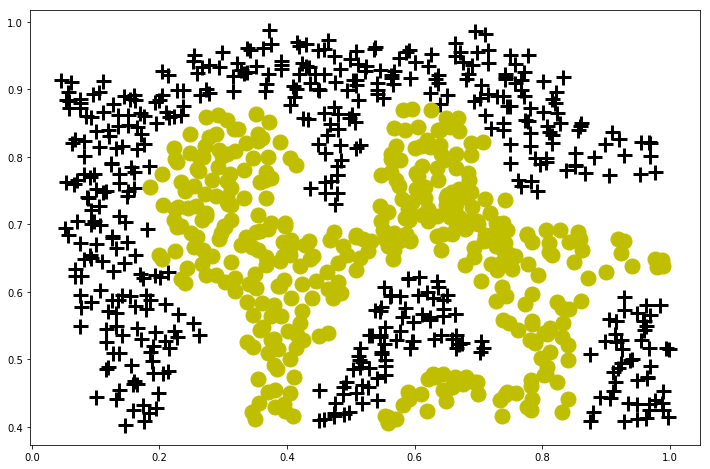

In [52]:
## =============== Part 4: Visualizing Dataset 2 ================
#  The following code will load the next dataset into your environment and 
#  plot the data. 
#

print('Loading and Visualizing Data ...')

# Load from ex6data2: 
# You will have X, y in your environment
mat = scipy.io.loadmat('data/svm/ex6data2.mat')
X = mat["X"]
y = mat["y"]

# Plot training data
plt.close()
plt.figure(figsize=(12,8))
plotData(X, y)

In order to visualize the SVM-trained boundaries around the data categories, we define a new visualization function.

In [53]:
def visualizeBoundary(X, y, model, varargin=0):
    #VISUALIZEBOUNDARY plots a non-linear decision boundary learned by the SVM
    #   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a non-linear decision 
    #   boundary learned by the SVM and overlays the data on it

    # Plot the training data on top of the boundary
    plotData(X, y)

    # Make classification predictions over a grid of values
    x1plot = np.linspace(X[:,0].min(), X[:,0].max(), 100).T
    x2plot = np.linspace(X[:,1].min(), X[:,1].max(), 100).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
       this_X = np.column_stack((X1[:, i], X2[:, i]))
       vals[:, i] = model.predict(gaussianKernelGramMatrix(this_X, X))

    # Plot the SVM boundary
    plt.contour(X1, X2, vals, colors="blue", levels=[0,0])
    plt.show(block=False)

And now we can train a SVM with a Gaussian RBF kernel and visualize the boundaries it learns:

Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...
[LibSVM]

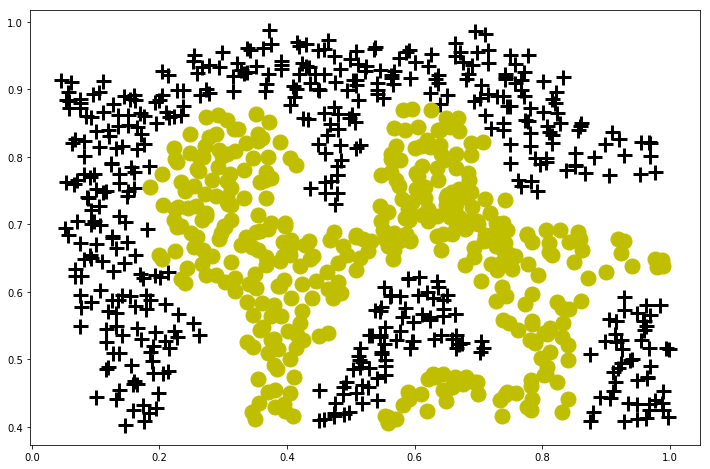

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


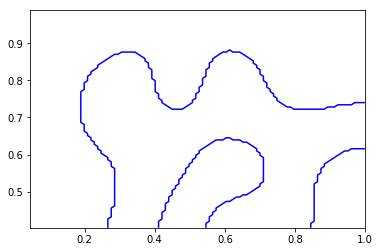

In [54]:
## ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
#  After you have implemented the kernel, we can now use it to train the 
#  SVM classifier.
# 
print('Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...');

# Load from ex6data2: 
# You will have X, y in your environment
#already loaded in last part

# SVM Parameters
C = 1
sigma = 0.1

# We set the tolerance and max_passes lower here so that the code will run
# faster. However, in practice, you will want to run the training to
# convergence.
model = svmTrain(X, y, C, "gaussian")

# alternative if don't want to implement Gaussian kernel
# model = svmt.svmTrain(X, y.flatten(), C, "rbf", gamma=6) 

plt.close()
plt.figure(figsize=(12,8))
visualizeBoundary(X, y, model)


## Optimizing SVM parameters

Now we consider a third dataset

Loading and Visualizing Data ...


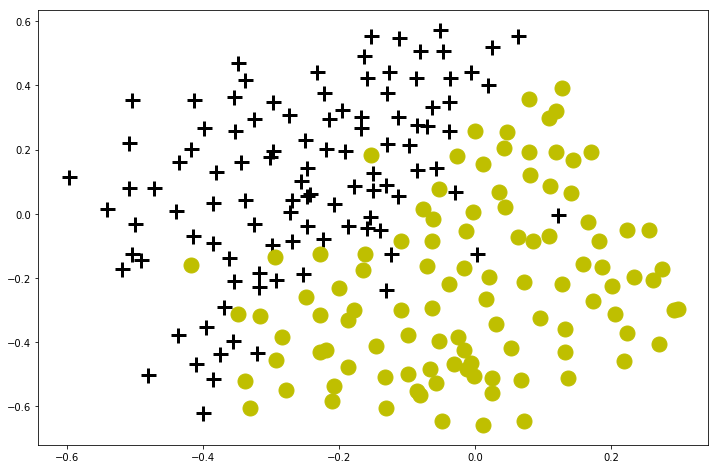

In [55]:
## =============== Part 6: Visualizing Dataset 3 ================
#  The following code will load the next dataset into your environment and 
#  plot the data. 
#

print('Loading and Visualizing Data ...')

# Load from ex6data3: 
# You will have X, y in your environment
mat = scipy.io.loadmat('data/svm/ex6data3.mat')
X = mat["X"]
y = mat["y"]

# Plot training data
plt.close()
plt.figure(figsize=(12,8))
plotData(X, y)

We can try different parameters on a validation set to find a good fit for the trained boundaries. We define a function to explore the range {0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30} for ``C`` and ``sigma``.

In [56]:
def dataset3Params(X, y, Xval, yval):
    #EX6PARAMS returns your choice of C and sigma for Part 3 of the exercise
    #where you select the optimal (C, sigma) learning parameters to use for SVM
    #with RBF kernel
    #   [C, sigma] = EX6PARAMS(X, y, Xval, yval) returns your choice of C and 
    #   sigma. You should complete this function to return the optimal C and 
    #   sigma based on a cross-validation set.
    #

    # You need to return the following variables correctly.
    sigma = 0.3
    C = 1

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return the optimal C and sigma
    #               learning parameters found using the cross validation set.
    #               You can use svmPredict to predict the labels on the cross
    #               validation set. For example, 
    #                   predictions = svmPredict(model, Xval)
    #               will return the predictions on the cross validation set.
    #
    #  Note: You can compute the prediction error using 
    #        mean(double(predictions ~= yval))
    #

    ### determining best C and sigma

    # need x1 and x2, copied from ex6.py
    x1 = [1, 2, 1] 
    x2 = [0, 4, -1]

    # only uncomment if similar lines are uncommented on svmTrain.py
    # yval = yval.astype("int32")
    # yval[yval==0] = -1

    # vector with all predictions from SVM
    predictionErrors = np.zeros((64,3))
    predictionsCounter = 0

    # iterate over values of sigma and C
    for sigma in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
        for C in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:

            print("trying sigma={:.2f}, C={:.2f}".format(sigma, C))
            
            # train model on training corpus with current sigma and C
            model = svmTrain(X, y, C, "gaussian", sigma=sigma)

            # compute predictions on cross-validation set
            predictions = model.predict(gaussianKernelGramMatrix(Xval, X))

            # compute prediction errors on cross-validation set
            predictionErrors[predictionsCounter,0] = np.mean((predictions != yval).astype(int))

            # store corresponding C and sigma
            predictionErrors[predictionsCounter,1] = sigma      
            predictionErrors[predictionsCounter,2] = C      
            
            # move counter up by one
            predictionsCounter = predictionsCounter + 1

    print(predictionErrors)

    # calculate mins of columns with their indexes
    row = predictionErrors.argmin(axis=0)
    m   = np.zeros(row.shape)
    for i in range(len(m)):
        m[i] = predictionErrors[row[i]][i]


    # note that row[0] is the index of the min of the first column
    #   and that the first column corresponds to the error, 
    #   so the row at predictionErrors(row(1),:) has best C and sigma
    print(predictionErrors[row[0],1])
    print(predictionErrors[row[0],2])

    # get C and sigma form such row
    sigma = predictionErrors[row[0],1]
    C     = predictionErrors[row[0],2]


    return C, sigma

And we run it to find the optimal values of ``C`` and ``sigma``.

In [57]:
## ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

#  This is a different dataset that you can use to experiment with. Try
#  different values of C and sigma here.
# 

# Load from ex6data3: 
# You will have X, y in your environment
#laredy loaded in last part
Xval = mat["Xval"]
yval = mat["yval"]

# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)


trying sigma=0.01, C=0.01
[LibSVM]trying sigma=0.01, C=0.03
[LibSVM]trying sigma=0.01, C=0.10
[LibSVM]trying sigma=0.01, C=0.30
[LibSVM]trying sigma=0.01, C=1.00
[LibSVM]trying sigma=0.01, C=3.00
[LibSVM]trying sigma=0.01, C=10.00
[LibSVM]trying sigma=0.01, C=30.00
[LibSVM]trying sigma=0.03, C=0.01
[LibSVM]trying sigma=0.03, C=0.03
[LibSVM]trying sigma=0.03, C=0.10
[LibSVM]trying sigma=0.03, C=0.30
[LibSVM]trying sigma=0.03, C=1.00
[LibSVM]trying sigma=0.03, C=3.00
[LibSVM]trying sigma=0.03, C=10.00
[LibSVM]trying sigma=0.03, C=30.00
[LibSVM]trying sigma=0.10, C=0.01
[LibSVM]trying sigma=0.10, C=0.03
[LibSVM]trying sigma=0.10, C=0.10
[LibSVM]trying sigma=0.10, C=0.30
[LibSVM]trying sigma=0.10, C=1.00
[LibSVM]trying sigma=0.10, C=3.00
[LibSVM]trying sigma=0.10, C=10.00
[LibSVM]trying sigma=0.10, C=30.00
[LibSVM]trying sigma=0.30, C=0.01
[LibSVM]trying sigma=0.30, C=0.03
[LibSVM]trying sigma=0.30, C=0.10
[LibSVM]trying sigma=0.30, C=0.30
[LibSVM]trying sigma=0.30, C=1.00
[LibSVM]trying s

Finally, we use these parameters to train a SVM model and visualize its boundaries

In [ ]:
# train model on training corpus with current sigma and C
model = svmTrain(X, y, C, "gaussian", sigma=sigma)
plt.close()
plt.figure(figsize=(12,8))
visualizeBoundary(X, y, model)

#  Spam Classification with SVMs

Now that we've applied SVMs to datasets and tuned their parameters, we can apply them to a more real-world application: spam classification (or curation ;).

With a trained SVM we'll determine whether an unseen email is spam (``y=1``) or not spam (``y=0``).

## Vectorizing emails

In order to turn email text into training data that we can use in an SVM, we first need to establish a pipeline to turn each of the emails into a feature vector.

The data we'll be working with comes from the [SpamAssassin Public Corpus](http://csmining.org/index.php/spam-assassin-datasets.html) and contains only the body of the email (without the headers).

Doing some data exploration can help us see how we can process these emails to eventually vectorize them

Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0). In particular, you need to convert each email into a feature vector x 2 Rn. The following parts of the exercise will walk you through how such a feature vector can be constructed from an email.

In [59]:
def readFile(filename):
    #READFILE reads a file and returns its entire contents 
    #   file_contents = READFILE(filename) reads a file and returns its entire
    #   contents in file_contents
    #

    # Load File
    try:
        with open(filename, 'r') as openFile:
            file_contents = openFile.read()
    except:
        file_contents = ''
        print('Unable to open {:s}'.format(filename))

    return file_contents

In [61]:
## ==================== Part 1: Email Preprocessing ====================
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in processEmail.m to produce a word indices vector
#  for a given email.

print('Preprocessing sample email (emailSample1.txt)')

# Extract Features
file_contents = readFile('data/svm/emailSample1.txt')
print(file_contents)

Preprocessing sample email (emailSample1.txt)
> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




### Feature engineering

Items like email addresses, URLs, numbers and dollar amounts can be normalized. Different emails make reference to distinct specific addresses and amounts, but for our purposes it makes sense to treat them all as the same kind of entity. 

For instance, we can replace all URLs for the string ``httpaddr`` to indicate that the email had a URL at that location. This makes it possible for the presence or absence of a URL to be a feature to be used by the spam classifier, instead of having a feature for every URL possible. Given that spam emails tend to use odd, unique-looking URLs, we can save a lot of features with normalization.

Normalizing text this way usually has the effect of [improving classifier performance](https://nlp.stanford.edu/IR-book/html/htmledition/features-for-text-1.html).

Choosing which words we use in the classifier is also important. For this exercise, the most frequent words have already been selected and are included in ``vocab.txt``. Rare words that occur only in a few emails could throw the classifier off by causing it to overfit. The vocabulary list was chosen by selecting words with a minimum frequency of 100 across the whole SpamAssassin corpus. Our feature set consists of only 1899 words, but in the real world we can easily have vocabulary lists of tens of thousands of tokens.

See the comments on the preprocessing code below to see more details on how each email is processed and normalized.

In [62]:
def getVocabList():
    #GETVOCABLIST reads the fixed vocabulary list in vocab.txt and returns a
    #cell array of the words
    #   vocabList = GETVOCABLIST() reads the fixed vocabulary list in vocab.txt 
    #   and returns a cell array of the words in vocabList.


    ## Read the fixed vocabulary list
    with open('data/svm/vocab.txt', 'r') as vocabFile:

        # Store all dictionary words in dictionary vocabList
        vocabList = {}
        for line in vocabFile.readlines():
            i, word = line.split()
            vocabList[word] = int(i)

    return vocabList

In [66]:
from nltk.stem.porter import *
import re
def processEmail(email_contents,verbose=False):
    #PROCESSEMAIL preprocesses a the body of an email and
    #returns a list of word_indices 
    #   word_indices = PROCESSEMAIL(email_contents) preprocesses 
    #   the body of an email and returns a list of indices of the 
    #   words contained in the email. 
    #

    # Load Vocabulary
    vocabList = getVocabList()

    # Init return value
    word_indices = []

    # ========================== Preprocess Email ===========================

    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers

    # hdrstart = email_contents.find("\n\n")
    # if hdrstart:
    #     email_contents = email_contents[hdrstart:]

    # Lower case
    email_contents = email_contents.lower()

    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.sub('[0-9]+', 'number', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.sub('(http|https)://[^\s]*', 'httpaddr', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents)

    # Handle $ sign
    email_contents = re.sub('[$]+', 'dollar', email_contents)


    # ========================== Tokenize Email ===========================

    # Output the email to screen as well
    if verbose: print('\n==== Processed Email ====\n\n')

    # Process file
    l = 0

    # Slightly different order from matlab version

    # Split and also get rid of any punctuation
    # regex may need further debugging...
    email_contents = re.split(r'[@$/#.-:&\*\+=\[\]?!(){},\'\'\">_<;%\s\n\r\t]+', email_contents)

    stemmer = PorterStemmer()
    
    for token in email_contents:

        # Remove any non alphanumeric characters
        token = re.sub('[^a-zA-Z0-9]', '', token)

        # Stem the word 
        token = stemmer.stem(token.strip())

        # Skip the word if it is too short
        if len(token) < 1:
           continue

        # Look up the word in the dictionary and add to word_indices if
        # found
        # ====================== YOUR CODE HERE ======================
        # Instructions: Fill in this function to add the index of str to
        #               word_indices if it is in the vocabulary. At this point
        #               of the code, you have a stemmed word from the email in
        #               the variable str. You should look up str in the
        #               vocabulary list (vocabList). If a match exists, you
        #               should add the index of the word to the word_indices
        #               vector. Concretely, if str = 'action', then you should
        #               look up the vocabulary list to find where in vocabList
        #               'action' appears. For example, if vocabList{18} =
        #               'action', then, you should add 18 to the word_indices 
        #               vector (e.g., word_indices = [word_indices ; 18]; ).
        # 
        # Note: vocabList{idx} returns a the word with index idx in the
        #       vocabulary list.
        # 
        # Note: You can use strcmp(str1, str2) to compare two strings (str1 and
        #       str2). It will return 1 only if the two strings are equivalent.
        #

        idx = vocabList[token] if token in vocabList else 0

        # only add entries which are in vocabList
        #   i.e. those with ind ~= 0, 
        #        given that ind is assigned 0 if str is not found in vocabList
        if idx > 0:
            word_indices.append(idx)

        # =============================================================


        # Print to screen, ensuring that the output lines are not too long
        if l + len(token) + 1 > 78:
            if verbose: print("")
            l = 0
        if verbose: print('{:s}'.format(token)),
        l = l + len(token) + 1

    # Print footer
    if verbose: print('\n\n=========================\n')

    return word_indices

We can compare the email before processing...

---


In [67]:
print(file_contents)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




---
...and after processing, where we end up with a list of words.

In [68]:
word_indices  = processEmail(file_contents,True)

# Print Stats
print('Word Indices: ')
print(' {:s}'.format(str(word_indices)))
print('\n\n')


==== Processed Email ====


anyon
know
how
much
it
cost
to
host
a
web
portal
well
it
depend
on
how
mani

visitor
you
re
expect
thi
can
be
anywher
from
less
than
number
buck
a
month

to
a
coupl
of
dollarnumb
you
should
checkout
httpaddr
or
perhap
amazon
ecnumb

if
your
run
someth
big
to
unsubscrib
yourself
from
thi
mail
list
send
an

email
to
emailaddr



Word Indices: 
 [86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1893, 1364, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]





### Feature extraction

From here, we can now turn emails into vectors in $\mathbb{R}^{n}$ (vectors with $n$ terms or $n$ dimensions), where $n$ is the size of our vocabulary, 1899.

Each vector derived from an email will represent the presence in the email (1) or absence from the email (0) of each of the words of the vocabulary.

``emailFeatures()`` below extracts these features from emails.

In [69]:
def emailFeatures(word_indices):
    #EMAILFEATURES takes in a word_indices vector and produces a feature vector
    #from the word indices
    #   x = EMAILFEATURES(word_indices) takes in a word_indices vector and 
    #   produces a feature vector from the word indices. 

    # Total number of words in the dictionary
    n = 1899
    # You need to return the following variables correctly.
    x = np.zeros((n, 1))

    
    # iterate over idx items in word_indices
    for idx in word_indices:
        # assign 1 to index idx in x
        x[idx] = 1
    return x

Turning the email above into a vector now consists of extracting its features! Below we can see how many elements of its feature vector are nonzero.

In [70]:
## ==================== Part 2: Feature Extraction ====================
#  Now, you will convert each email into a vector of features in R^n. 
#  You should complete the code in emailFeatures.m to produce a feature
#  vector for a given email.

print('Extracting features from sample email (emailSample1.txt)')

# Extract Features
#file_contents = rf.readFile('emailSample1.txt')
#word_indices  = pe.processEmail(file_contents)
features      = emailFeatures(word_indices)

# Print Stats
print('Length of feature vector: {:d}'.format( len(features) ) )
print('Number of non-zero entries: {:d}'.format( np.sum(features > 0) ) )

Extracting features from sample email (emailSample1.txt)
Length of feature vector: 1899
Number of non-zero entries: 45


Of course, 45 is also the number of unique word indices in the list resulting from email preprocessing.

## Training a spam classifier

With a pipeline from email to feature vector established, we can work with the (previously preprocessed) emails feature vectors in the ``spamTrain.mat`` file. 

With these email feature vectors we will train a SVM spam classifier model.

In [71]:
## =========== Part 3: Train Linear SVM for Spam Classification ========
#  In this section, you will train a linear classifier to determine if an
#  email is Spam or Not-Spam.

# Load the Spam Email dataset
# You will have X, y in your environment
mat = scipy.io.loadmat('data/svm/spamTrain.mat')
X = mat["X"]
y = mat["y"]

y = y.flatten()

print('Training Linear SVM (Spam Classification)')
print('(this may take 1 to 2 minutes) ...')

C = 0.1
model = svmTrain(X, y, C, "linear")

Training Linear SVM (Spam Classification)
(this may take 1 to 2 minutes) ...
[LibSVM]

Then we make predictions on the training data from the model and assess their accuracy.

In [73]:
p = model.predict(X)

print('Training Accuracy: {:f}'.format( np.mean((p == y).astype(int)) * 100 ))

Training Accuracy: 99.825000


And we evaluate the model on unseen test data.

In [74]:
## =================== Part 4: Test Spam Classification ================
#  After training the classifier, we can evaluate it on a test set. We have
#  included a test set in spamTest.mat

# Load the test dataset
# You will have Xtest, ytest in your environment
mat = scipy.io.loadmat('data/svm/spamTest.mat')
Xtest = mat["Xtest"]
ytest = mat["ytest"]

ytest = ytest.flatten()

print('Evaluating the trained Linear SVM on a test set ...')
print("Xtest:",Xtest.shape)
p = model.predict(Xtest)

print('Test Accuracy: {:f}'.format( np.mean((p == ytest).astype(int)) * 100 ))

Evaluating the trained Linear SVM on a test set ...
Xtest: (1000, 1899)
Test Accuracy: 98.900000


## Understanding a spam classifier

One advantage of using the linear kernel for our SVM is that we can peek inside the weights to better understand how it discriminates spam from non-spam (ham?) email.

The following are the words that the classifier has most strongly linked to a positive spam classification.

In [75]:
## ================= Part 5: Top Predictors of Spam ====================
#  Since the model we are training is a linear SVM, we can inspect the
#  weights learned by the model to understand better how it is determining
#  whether an email is spam or not. The following code finds the words with
#  the highest weights in the classifier. Informally, the classifier
#  'thinks' that these words are the most likely indicators of spam.
#

# Sort the weights and obtain the vocabulary list
w = model.coef_[0]

# from http://stackoverflow.com/a/16486305/583834
# reverse sorting by index
indices = w.argsort()[::-1][:15]
vocabList = sorted(getVocabList().keys())

print('\nTop predictors of spam: \n');
for idx in indices: 
    print( ' {:s} ({:f}) '.format( vocabList[idx], float(w[idx]) ) )


Top predictors of spam: 

 our (0.500614) 
 click (0.465916) 
 remov (0.422869) 
 guarante (0.383622) 
 visit (0.367710) 
 basenumb (0.345064) 
 dollar (0.323632) 
 will (0.269724) 
 price (0.267298) 
 pleas (0.261169) 
 most (0.257298) 
 nbsp (0.253941) 
 lo (0.253467) 
 ga (0.248297) 
 hour (0.246404) 


## More spam! (Maybe!)

Since we established a pipeline to process emails to determine whether they're spam or not, it makes sense to use it for at least a few more examples.

Below we read a few normal and spam emails and show how the model classifies them.

In [80]:
## =================== Part 6: Try Your Own Emails =====================
#  Now that you've trained the spam classifier, you can use it on your own
#  emails! In the starter code, we have included spamSample1.txt,
#  spamSample2.txt, emailSample1.txt and emailSample2.txt as examples. 
#  The following code reads in one of these emails and then uses your 
#  learned SVM classifier to determine whether the email is Spam or 
#  Not Spam

# Set the file to be read in (change this to spamSample2.txt,
# emailSample1.txt or emailSample2.txt to see different predictions on
# different emails types). Try your own emails as well!
filenames = ['data/svm/spamSample1.txt','data/svm/spamSample2.txt',\
         'data/svm/emailSample1.txt','data/svm/emailSample2.txt']
icons = ['💩','🙌','👍','👏']
print("Spam Classification :1 indicates spam, 0 indicates not spam")
index =0
for filename in filenames:
    # Read and predict
    file_contents = readFile(filename)
    word_indices  = processEmail(file_contents)
    x             = emailFeatures(word_indices)
    p = model.predict(x.T)
   
    print('Processed {:s}: {:s} {:s}\n'.format(filename, str(p[0]),icons[index]))
    index=index+1

Spam Classification :1 indicates spam, 0 indicates not spam
Processed data/svm/spamSample1.txt: 0 💩

Processed data/svm/spamSample2.txt: 1 🙌

Processed data/svm/emailSample1.txt: 0 👍

Processed data/svm/emailSample2.txt: 0 👏

